# Linear regression in PyTorch

Markus Enzweiler, markus.enzweiler@hs-esslingen.de

This is a demo used in a Computer Vision & Machine Learning lecture. Feel free to use and contribute.

## Setup

Adapt `packagePath` to point to the directory containing this notebeook.

In [46]:
# Notebook id
nb_id = "linear_regression/torch"

# Imports
import sys
import os

In [47]:
# Package Path (folder of this notebook)

#####################
# Local environment #
#####################

package_path = "./"


#########
# Colab #
#########


def check_for_colab():
    try:
        import google.colab

        return True
    except ImportError:
        return False


# running on Colab?
on_colab = check_for_colab()

if on_colab:
    # assume this notebook is run from Google Drive and the whole
    # cv-ml-lecture-notebooks repo has been setup via setupOnColab.ipynb

    # Google Drive mount point
    gdrive_mnt = "/content/drive"

    ##########################################################################
    # Ensure that this is the same as gdrive_repo_root in setupOnColab.ipynb #
    ##########################################################################
    # Path on Google Drive to the cv-ml-lecture-notebooks repo
    gdrive_repo_root = f"{gdrive_mnt}/MyDrive/cv-ml-lecture-notebooks"

    # mount drive
    from google.colab import drive

    drive.mount(gdrive_mnt, force_remount=True)

    # set package path
    package_path = f"{gdrive_repo_root}/{nb_id}"

# check whether package path exists
if not os.path.isdir(package_path):
    raise FileNotFoundError(f"Package path does not exist: {package_path}")

print(f"Package path: {package_path}")

Package path: ./


In [48]:
# Additional imports

# Repository Root
repo_root = os.path.abspath(os.path.join(package_path, "..", ".."))
# Add the repository root to the system path
if repo_root not in sys.path:
    sys.path.append(repo_root)

# Package Imports
from nbutils import requirements as nb_reqs
from nbutils import colab as nb_colab
from nbutils import git as nb_git
from nbutils import exec as nb_exec
from nbutils import data as nb_data

In [49]:
# Install requirements in the current Jupyter kernel
req_file = os.path.join(package_path, "requirements.txt")
nb_reqs.pip_install_reqs(req_file, on_colab)

['/Users/arthurzhao/anaconda3/envs/cv-ml-torch/bin/python', '-m', 'pip', 'install', '-r', './requirements.txt']


In [50]:
# Now we should be able to import the additional packages
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
torch.manual_seed(0);

## Linear regression

### Create some data based on adding noise to a known linear function

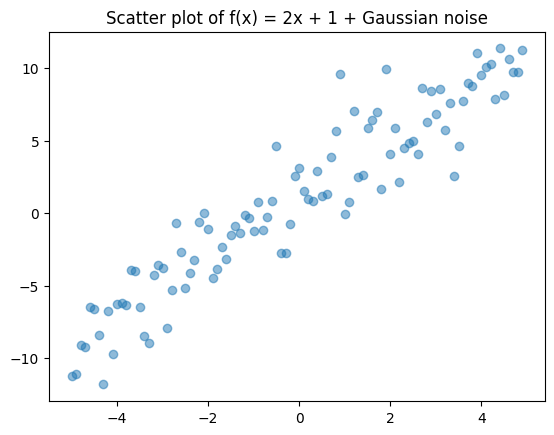

In [51]:
# Creating a function f(x) with a slope of 2 and bias of 1, e.g. f(x) = 2x + 1
# and added Gaussian noise

# True parameters
w_true = 2
b_true = 1
params_true = torch.tensor([w_true, b_true])

X = torch.arange(-5, 5, 0.1)
Y = w_true * X + b_true + 2 * torch.randn(X.shape)

# Visualize
plt.scatter(X, Y, alpha=0.5)
plt.title("Scatter plot of f(x) = 2x + 1 + Gaussian noise")
plt.show()

### Linear model and loss

Our linear regression model is $ y = f(x) = w \cdot x + b$. We solve for $w$ and $b$ using gradient descent. 

In [52]:
def lin_model(params, x):
    w, b = params
    return w * x + b

We uses mean squared error loss between the predictions of our model and true values. 

In [53]:
def loss_fn(y_pred, y):
    return torch.mean(torch.square(y - y_pred))

### Optimization via gradient descent

Initialize parameters $w$ and $b$ randomly.

In [54]:
params = 1e-2 * torch.randn(2, dtype=torch.float32)

# we track gradients for the parameters w and b
params.requires_grad_()

w, b = params
print(f"Initial weight : {w}")
print(f"Initial bias   : {b}")

Initial weight : 0.013232016004621983
Initial bias   : 0.0003711430181283504


Optimize via gradient descent

In [55]:
# Hyperparameters
num_iters = 10000
learning_rate = 3e-4

# Loop over the number of iterations
for it in range(num_iters):
    # predict y from x
    Y_pred = lin_model(params, X)

    # Compute the loss
    loss = loss_fn(Y_pred, Y)

    # Gradient of loss function w.r.t parameters
    loss.backward()
    
    # update parameters via gradient descent update rules
    with torch.no_grad():
        params -= learning_rate * params.grad
        params.grad.zero_()

    # Give some status output once in a while
    if it % 500 == 0 or it == num_iters - 1:
        w, b = params
        error_norm = torch.sum(torch.square(params - params_true)) ** 0.5
        print(
            f"Iteration {it:5d} | Loss {loss.item():>10.5f} | "
            f"w {w.item():> 8.5f} | b {b.item():> 8.5f} | Error norm {error_norm.item():>.5f}"
        )

w, b = params
print(f"Final weight after optimization : {w.item():.5f} (true: {w_true})")
print(f"Final bias after optimization   : {b.item():.5f} (true: {b_true})")

Iteration     0 | Loss   38.02029 | w  0.02313 | b  0.00096 | Error norm 2.21497


Iteration   500 | Loss    5.06356 | w  1.83346 | b  0.27028 | Error norm 0.74849
Iteration  1000 | Loss    4.55538 | w  1.98231 | b  0.47792 | Error norm 0.52237
Iteration  1500 | Loss    4.39332 | w  1.99538 | b  0.63242 | Error norm 0.36761
Iteration  2000 | Loss    4.30515 | w  1.99714 | b  0.74693 | Error norm 0.25309
Iteration  2500 | Loss    4.25676 | w  1.99780 | b  0.83176 | Error norm 0.16825
Iteration  3000 | Loss    4.23021 | w  1.99823 | b  0.89461 | Error norm 0.10541
Iteration  3500 | Loss    4.21563 | w  1.99855 | b  0.94117 | Error norm 0.05885
Iteration  4000 | Loss    4.20763 | w  1.99879 | b  0.97566 | Error norm 0.02437
Iteration  4500 | Loss    4.20324 | w  1.99896 | b  1.00121 | Error norm 0.00160
Iteration  5000 | Loss    4.20084 | w  1.99908 | b  1.02014 | Error norm 0.02016
Iteration  5500 | Loss    4.19951 | w  1.99918 | b  1.03417 | Error norm 0.03418
Iteration  6000 | Loss    4.19879 | w  1.99925 | b  1.04456 | Error norm 0.04456
Iteration  6500 | Loss    4.

Visualize linear fit

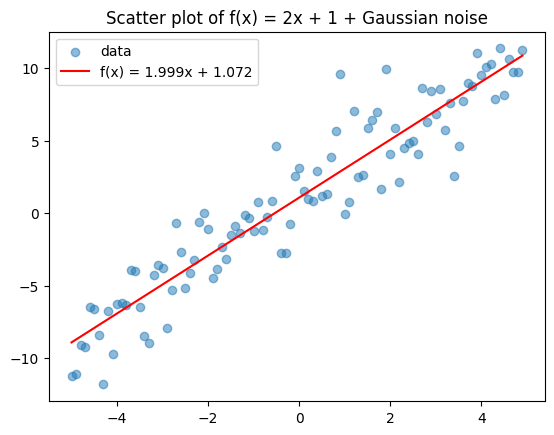

In [56]:
# Visualize
plt.scatter(X, Y, alpha=0.5)
plt.title("Scatter plot of f(x) = 2x + 1 + Gaussian noise")

# Plot the recovered line
Y_model = lin_model(params, X)
plt.plot(X.tolist(), Y_model.tolist(), color="red")

plt.legend(["data", f"f(x) = {w.item():.3f}x + {b.item():.3f}"])
plt.show()